# Model selection BIC - AIC

In [1]:
# plot in notebook, does not need plt.show()
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # pretty plots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
sns.set_context('notebook', font_scale=2) # contexto de seaborn (setea algunos valores como tamaño de letra y bordes)
sns.set_style('white') # estilo de seaborn, color de fondo y tipo de letra
plt.rcParams['figure.figsize'] = (12, 6) # setea tamaño por defecto de las figuras

**cargar datos**

In [3]:
df = pd.read_csv('./datos/wool.csv', header=0)
y = df.values[:, 1] * 10
X = np.arange(len(y))
y += np.random.normal(scale=0.3, size=len(X))

**Separación train test**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

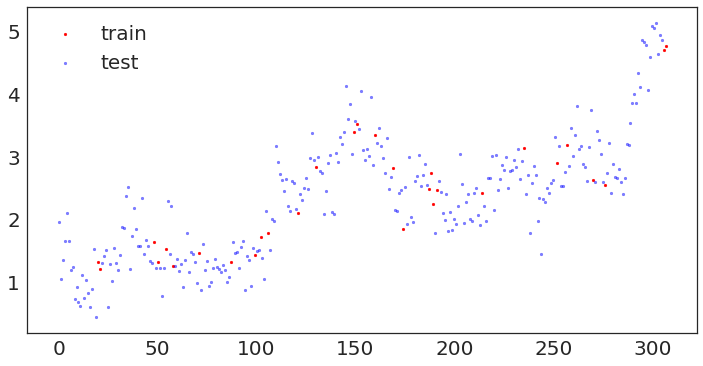

In [5]:
plt.scatter(X_train, y_train, c='r', label='train', s=8)
plt.scatter(X_test, y_test, c='b', label='test', s=8, alpha=0.5)
plt.legend()

**Regresión simple**

Usamos regresión lineal

In [6]:
train_miss = []
test_miss = []
nll = []
n_params = []

# create and train
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
lr = LinearRegression().fit(X_train, y_train)

# number of parameters
n_params.append(X_train.shape[1] + 1)

# train accuracy
train_miss.append(((lr.predict(X_train) - y_train)**2).mean())

# train negative log likelihood
nll.append(((lr.predict(X_train) - y_train)**2).sum())

# test accuracy
test_miss.append(((lr.predict(X_test) - y_test)**2).mean())

**Generar proyecciones y classificación**
$$AIC = 2d -2log(\mathcal{L}) $$

Se aumentan las _features_ transformandolas con una base polinimial de grado $1 \ldots `deg` $, y para cada set de features aumentadas se hace regresión lineal, luego calculamos y guardamos el __AIC__ y __BIC__ para cada uno

In [7]:
# augmented features
deg = 15
X_train_aug = X_train
X_test_aug = X_test
for i in range(2, deg + 1):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_aug = poly.fit_transform(X_train)
    X_test_aug = poly.transform(X_test)
    lr = LinearRegression().fit(X_train_aug, y_train)
    
    n_params.append(X_train_aug.shape[1] + 1)
    train_miss.append(((lr.predict(X_train_aug) - y_train)**2).mean())

    nll.append(((lr.predict(X_train_aug) - y_train)**2).sum())

    test_miss.append(((lr.predict(X_test_aug) - y_test)**2).mean())

aic = np.array(n_params) * 2 + np.array(nll)
bic = np.array(n_params) * np.log(X_train.shape[0]) + np.array(nll)

__Graficamos__

notar que en un mismo grafico estamos usando 2 escalas distintas (roja y azul), pero ambas dependen del número de parámetros dada por el grado de las features polinomiales.

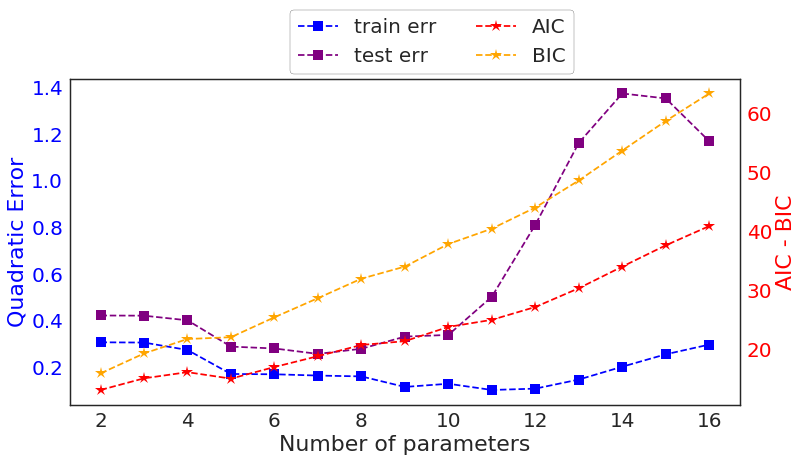

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(n_params, train_miss, '--sb', label='train err', ms=10)
ax1.plot(n_params, test_miss, '--s', c='purple', label='test err', ms=10)
ax1.set_xlabel('Number of parameters')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Quadratic Error', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()

ax2.plot(n_params, aic, '--*r', ms=13, label='AIC')
ax2.plot(n_params, bic, '--*', c='orange',  ms=13, label='BIC')
ax2.set_ylabel('AIC - BIC', color='r')
ax2.tick_params('y', colors='r')
fig.legend(loc=9, bbox_to_anchor=(0.5, 1.07), ncol=2, frameon=True, edgecolor='k')
plt.savefig('figura.pdf') # guarda la figura en pdf (vectorizada)